### Import libraries here

In [1]:
libPath = '/home/mayank/Documents/upgraded-octo-lamp/'
import sys
sys.path.append(libPath)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from v2i.src.core.common import loadPKL

### Datafiles path

In [2]:
homogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/homogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-05_12-18-55grg60_zo/data_tf_disabled.pkl'
homogeneousLV15Comm15Path = '/home/mayank/ray_results/homogeneous-full-comm-LV15m-Comm-15m/PPO_v2i-v0_0_2019-11-05_19-37-35q9vbzp4w/data_tf_disabled.pkl'
idmData = '/home/mayank/ray_results/homogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-05_12-18-55grg60_zo/idmData.pkl'
#heterogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/heterogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-06_01-29-19wd1ehb7g/data_tf_disabled.pkl'


# IDM only

In [3]:
idmDataHomo = loadPKL(idmData)

In [4]:
idmDataCars = {}

for carID in idmDataHomo[0][0].keys():
    idmDataCars[carID] = []

for episode in idmDataHomo[0].keys():
    #print(idmDataHomo[0][episode].keys())
    for carID in idmDataHomo[0][episode].keys():
        idmDataCars[carID].append(idmDataHomo[0][episode][carID])

NameError: name 'idmDataHomo' is not defined

# Homogeneous - Only Local view 15m

In [3]:
homoLocalView15mData = loadPKL(homogeneousOnlyLocalView15mPath)

In [4]:
homoLocalView15mData['max-episode-length']

2400

In [5]:
agentSpeedEpisodesHomoLV15m = {}
agentSpeedEpisodesHomoLV15m['complete'] = {}
agentSpeedEpisodesHomoLV15m['uncomplete'] = {}

for carID in homoLocalView15mData['data']['0.4_0.4'][0]['speed'].keys():
    agentSpeedEpisodesHomoLV15m['complete'][carID] = []
    agentSpeedEpisodesHomoLV15m['uncomplete'][carID] = []
    
totalEpisodes = 0
completeCount = 0
for episode in homoLocalView15mData['data']['0.4_0.4']:
    episodeLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    print(episodeLen)
    if episodeLen-1 == homoLocalView15mData['max-episode-length']:
        completeCount += 1
        for carID in homoLocalView15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15m['complete'][carID].append(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][carID])
    else:
        for carID in homoLocalView15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15m['uncomplete'][carID].append(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][carID])
    
    totalEpisodes += 1

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)


2401
2401
2401
2401
2222
2401
2401
2401
2401
2401
Percentage of full episodes :  90.0


# Homogeneous - LV 15m + Comm 15m

In [7]:
homoLV15mComm15mData = loadPKL(homogeneousLV15Comm15Path)

In [8]:
homoLV15mComm15mData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data', 'others'])

In [10]:
agentSpeedEpisodesHomoLV15mComm15m = {}
agentSpeedEpisodesHomoLV15mComm15m['complete'] = {}
agentSpeedEpisodesHomoLV15mComm15m['uncomplete'] = {}

for carID in homoLV15mComm15mData['data']['0.4_0.4'][0]['speed'].keys():
    agentSpeedEpisodesHomoLV15mComm15m['complete'][carID] = []
    agentSpeedEpisodesHomoLV15mComm15m['uncomplete'][carID] = []
    
totalEpisodes = 0
completeCount = 0
for episode in homoLV15mComm15mData['data']['0.4_0.4']:
    episodeLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLV15mComm15mData['max-episode-length']:
        completeCount += 1
        for carID in homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15mComm15m['complete'][carID].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][carID])
    else:
        for carID in homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15mComm15m['uncomplete'][carID].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][carID])
    
    totalEpisodes += 1

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)


Percentage of full episodes :  52.0


# Plot all

<IPython.core.display.Javascript object>


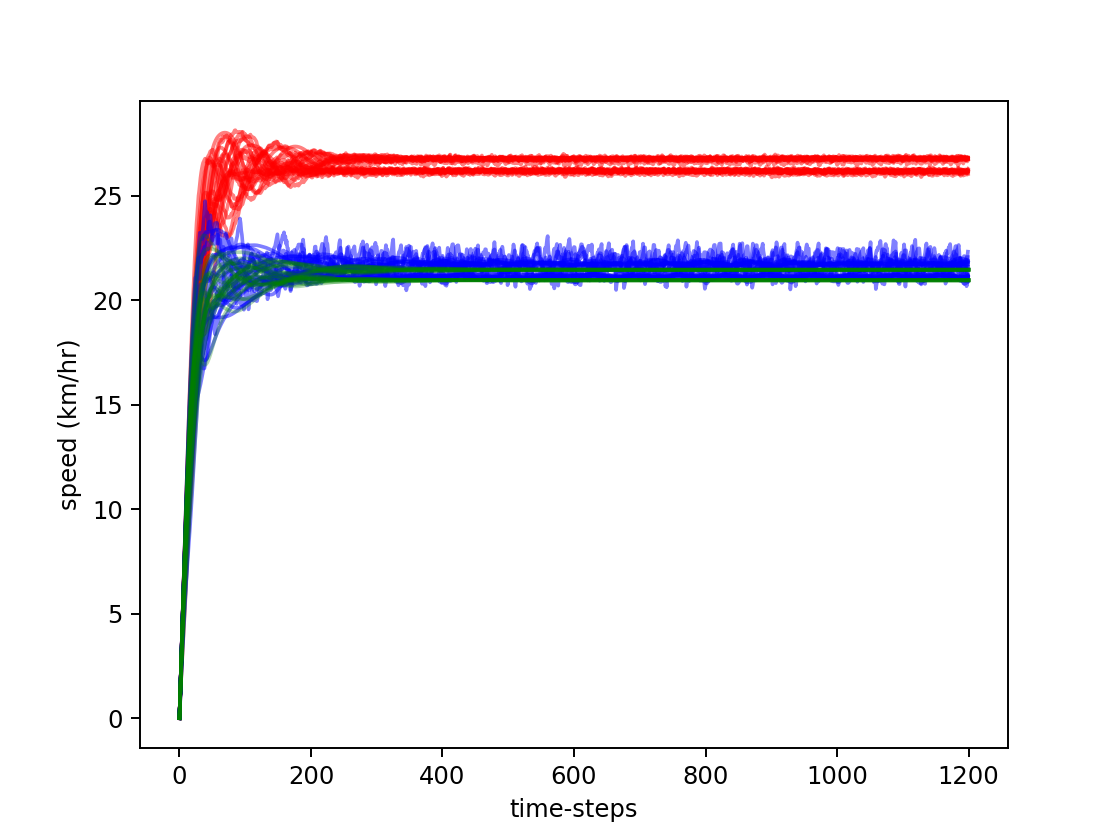

In [11]:
for carID in agentSpeedEpisodesHomoLV15mComm15m['complete'].keys():
    speedData = np.array(agentSpeedEpisodesHomoLV15mComm15m['complete'][carID]).transpose()
    speedData = speedData.mean(axis=1) * 3.6
    plt.plot(speedData[0:1200], alpha=.5, color='red')
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
plt.show()

for carID in agentSpeedEpisodesHomoLV15m['complete'].keys():
    speedData = np.array(agentSpeedEpisodesHomoLV15m['complete'][carID]).transpose()
    speedData = speedData.mean(axis=1) * 3.6
    plt.plot(speedData[0:1200], alpha=.5, color='blue')
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
plt.show()


for carID in idmDataCars.keys():
    speedData = np.array(idmDataCars[carID]).transpose()
    speedData = speedData.mean(axis=1)
    plt.plot(speedData * 3.6, color='green', alpha=0.3)
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
    #plt.legend()
plt.show()

# Querying

In [12]:
agentQueryEpisodesHomoLV15mComm15m = {}
agentQueryEpisodesHomoLV15mComm15m['complete'] = []
agentQueryEpisodesHomoLV15mComm15m['uncomplete'] = []
    

totalEpisodes = 0
completeCount = 0
for episode in homoLV15mComm15mData['data']['0.4_0.4']:
    episodeLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLV15mComm15mData['max-episode-length']:
        completeCount += 1
        agentQueryEpisodesHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['actions'])
    else:
        agentQueryEpisodesHomoLV15mComm15m['uncomplete'].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['actions'][1])
    
    totalEpisodes += 1


In [13]:
# Encode actions and separate plan and query
agentPlanHomoLV15mComm15 = []
agentQueryHomoLV15mComm15 = []

for data in agentQueryEpisodesHomoLV15mComm15m['complete']:
    plantmp = []
    querytmp = []
    for step in data:
        plantmp.append(step[0])
        querytmp.append(step[1])
    agentPlanHomoLV15mComm15.append(plantmp)
    agentQueryHomoLV15mComm15.append(querytmp)

planEncode = {}
planEncode['acc'] = 0
planEncode['dec'] = 1
planEncode['do-nothing'] = 2
planEncode['lane-change'] = 3

queryEncode = {}
queryEncode['null'] = 0
queryEncode['reg_0'] = 1
queryEncode['reg_1'] = 2

for i, data in enumerate(agentPlanHomoLV15mComm15):
    for j, step in enumerate(agentPlanHomoLV15mComm15[i]):
        agentPlanHomoLV15mComm15[i][j] = planEncode[agentPlanHomoLV15mComm15[i][j]]

for i, data in enumerate(agentQueryHomoLV15mComm15):
    for j, step in enumerate(agentQueryHomoLV15mComm15[i]):
        agentQueryHomoLV15mComm15[i][j] = queryEncode[agentQueryHomoLV15mComm15[i][j]]


<IPython.core.display.Javascript object>


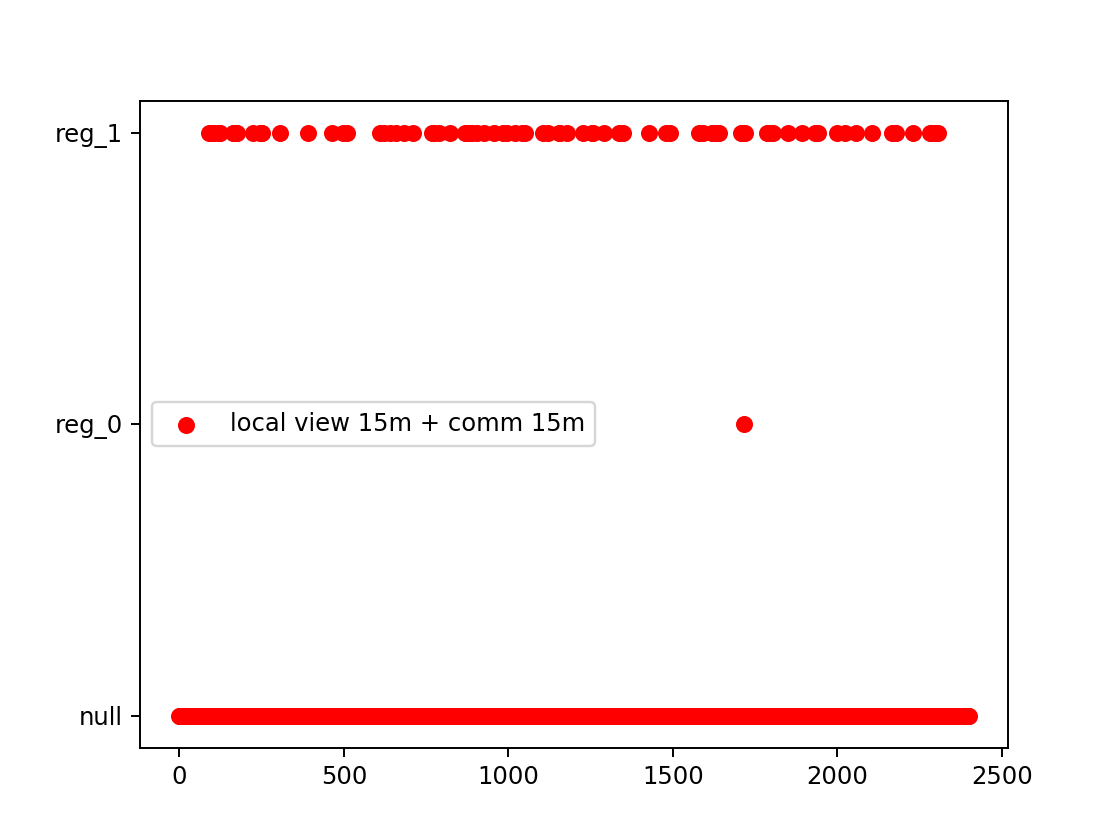

In [14]:
'''
for p in agentQueryHomoLV15mComm15:
    plt.scatter(np.arange(0, len(p)), p, color='red')
    plt.yticks(np.arange(0, len(queryEncode)), queryEncode.keys())
    break
'''
plt.scatter(np.arange(0, len(agentQueryHomoLV15mComm15[3])), agentQueryHomoLV15mComm15[3], color='red', label='local view 15m + comm 15m')
plt.yticks(np.arange(0, len(queryEncode)), queryEncode.keys())
plt.legend()

<IPython.core.display.Javascript object>


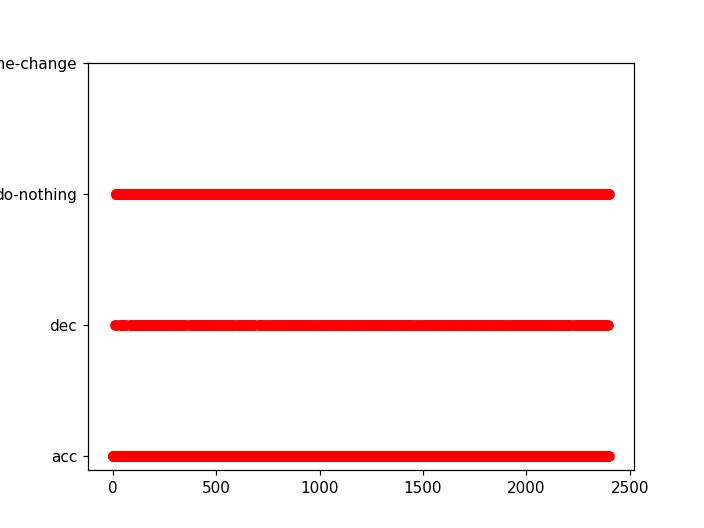

([<matplotlib.axis.YTick at 0x7ff3d97b88d0>,
 <a list of 4 Text yticklabel objects>)

In [204]:
'''
for p in agentPlanHomoLV15mComm15:
    plt.scatter(np.arange(0, len(p)), p, color='red')
    plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())
    break
'''
plt.scatter(np.arange(0, len(agentPlanHomoLV15mComm15[3])), agentPlanHomoLV15mComm15[3], color='red')
plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())

# Local view actions

In [165]:
agentQueryEpisodesHomoLocalView15m = {}
agentQueryEpisodesHomoLocalView15m['complete'] = []
agentQueryEpisodesHomoLocalView15m['uncomplete'] = []
    

totalEpisodes = 0
completeCount = 0
for episode in homoLocalView15mData['data']['0.4_0.4']:
    episodeLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLocalView15mData['max-episode-length']:
        completeCount += 1
        agentQueryEpisodesHomoLocalView15m['complete'].append(homoLocalView15mData['data']['0.4_0.4'][episode]['actions'])
    else:
        agentQueryEpisodesHomoLocalView15m['uncomplete'].append(homoLocalView15mData['data']['0.4_0.4'][episode]['actions'][1])
    
    totalEpisodes += 1


In [172]:
agentPlanHomoLocalView15m = []

for data in agentQueryEpisodesHomoLocalView15m['complete']:
    plantmp = []
    for step in data:
        plantmp.append(step[0])
    agentPlanHomoLocalView15m.append(plantmp)

for i, data in enumerate(agentPlanHomoLocalView15m):
    for j, step in enumerate(agentPlanHomoLocalView15m[i]):
        agentPlanHomoLocalView15m[i][j] = planEncode[agentPlanHomoLocalView15m[i][j]]

<IPython.core.display.Javascript object>


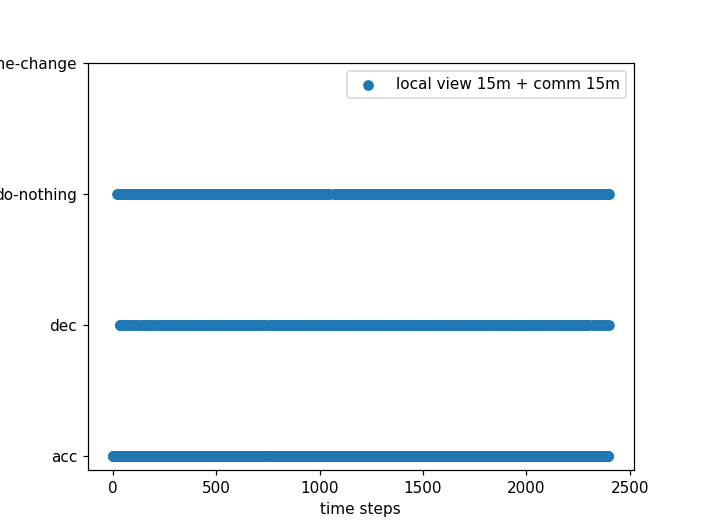

In [201]:
#plt.scatter(np.arange(0, len(agentPlanHomoLocalView15m[3])), agentPlanHomoLocalView15m[3], label='local view 15m')
plt.scatter(np.arange(0, len(agentPlanHomoLV15mComm15[2])), agentPlanHomoLV15mComm15[2], label='local view 15m + comm 15m')
plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())
plt.xlabel('time steps')
plt.legend()

# analyze agent speed initial for Local View and LV + Comm

In [139]:
lvSpeedOfAgent = []
for episode in homoLocalView15mData['data']['0.4_0.4'].keys():
    agentCarID = homoLocalView15mData['data']['0.4_0.4'][episode]['agentCarID']
    epLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][agentCarID])
    
    if epLen == (homoLocalView15mData['max-episode-length'] + 1):
        agentCarID = homoLocalView15mData['data']['0.4_0.4'][episode]['agentCarID']
        speedData = homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][agentCarID]
        #print(speedData)
        lvSpeedOfAgent.append(speedData)

lvSpeedOfAgent = np.array(lvSpeedOfAgent)
print(lvSpeedOfAgent.shape)

(41, 2401)


In [125]:
lvSpeedOfAgent = lvSpeedOfAgent.mean(axis=0)
lvSpeedOfAgent *= 3.6
lvSpeedOfAgent.shape

(2401,)

In [140]:
lvCommSpeedOfAgent = []
for episode in homoLV15mComm15mData['data']['0.4_0.4'].keys():
    agentCarID = homoLV15mComm15mData['data']['0.4_0.4'][episode]['agentCarID']
    epLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][agentCarID])
    
    if epLen == (homoLV15mComm15mData['max-episode-length'] + 1):
        agentCarID = homoLV15mComm15mData['data']['0.4_0.4'][episode]['agentCarID']
        speedData = homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][agentCarID]
        lvCommSpeedOfAgent.append(speedData)
    
lvCommSpeedOfAgent = np.array(lvCommSpeedOfAgent)
print(lvCommSpeedOfAgent.shape)

(26, 2401)


In [127]:
lvCommSpeedOfAgent = lvCommSpeedOfAgent.mean(axis=0)
lvCommSpeedOfAgent *= 3.6
print(lvCommSpeedOfAgent.shape)

(2401,)


<IPython.core.display.Javascript object>


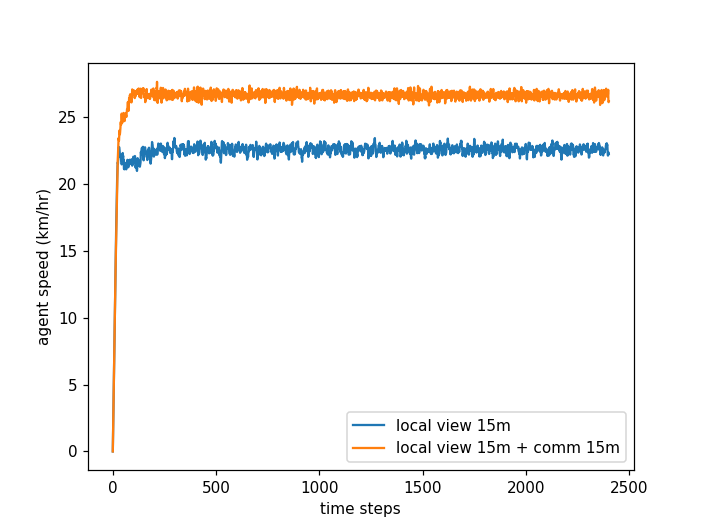

In [129]:
plt.plot(lvSpeedOfAgent, label='local view 15m')
plt.plot(lvCommSpeedOfAgent, label='local view 15m + comm 15m')
plt.xlabel('time steps')
plt.ylabel('agent speed (km/hr)')
plt.legend()

# Cars position graph

In [5]:
allCarsPos = {}
allCarsPos['complete'] = []
allCarsPos['uncomplete'] = []

carIDs = homoLocalView15mData['data']['0.4_0.4'][0]['Pos'][0].keys()
#print(carIDs)

for episode in homoLocalView15mData['data']['0.4_0.4'].keys():
    posVector = homoLocalView15mData['data']['0.4_0.4'][episode]['Pos']
    epLen = len(posVector)
    #print(epLen)
    if epLen-1 == homoLocalView15mData['max-episode-length']:
        
        tmpDict= {}
        for carID in carIDs:
            tmpDict[carID] = []
        
        for step in posVector:
            for car in step.keys():
                tmpDict[car].append(step[car])
        
        allCarsPos['complete'].append(tmpDict.copy())

<IPython.core.display.Javascript object>


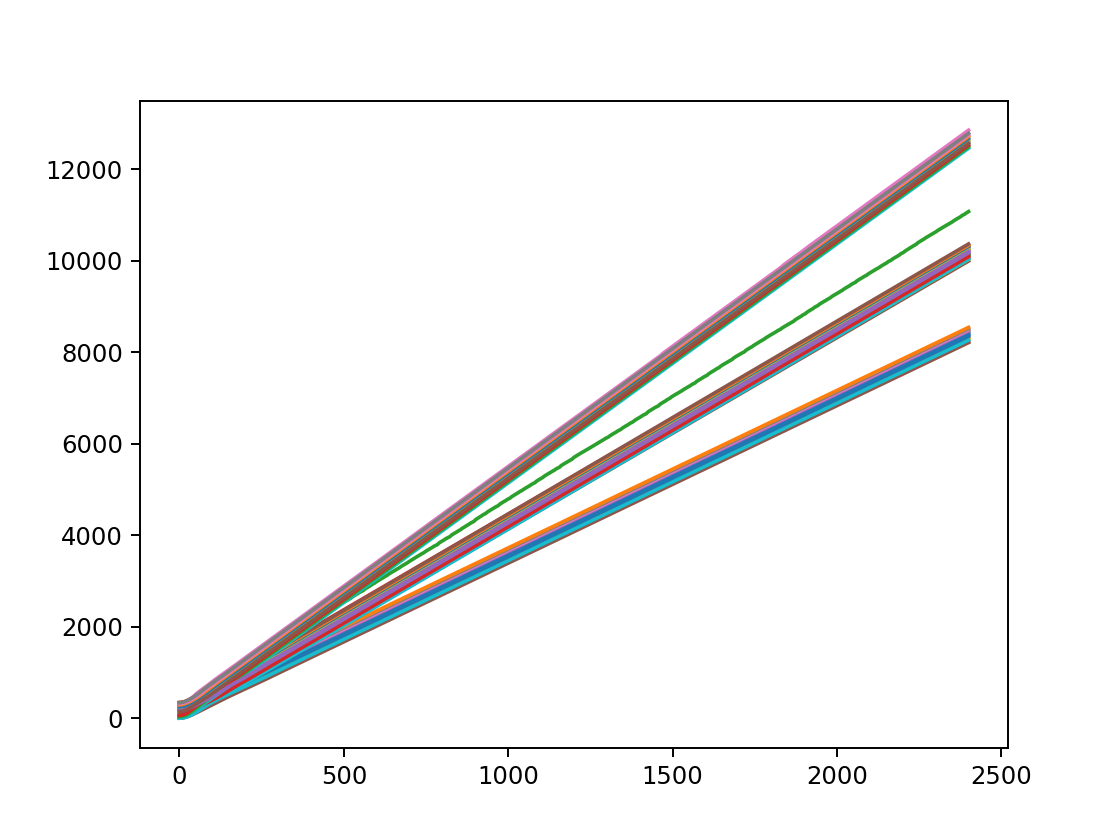

In [11]:
for episode in range(0, len(allCarsPos['complete'])):
    for carID in allCarsPos['complete'][episode].keys():
        plt.plot(allCarsPos['complete'][episode][carID])
    plt.show()
    break

In [9]:
allCarsPosComm15m = {}
allCarsPosComm15m['complete'] = []
allCarsPosComm15m['uncomplete'] = []

carIDs = homoLV15mComm15mData['data']['0.4_0.4'][0]['Pos'][0].keys()
#print(carIDs)

for episode in homoLV15mComm15mData['data']['0.4_0.4'].keys():
    posVector = homoLV15mComm15mData['data']['0.4_0.4'][episode]['Pos']
    epLen = len(posVector)
    #print(epLen)
    if epLen-1 == homoLV15mComm15mData['max-episode-length']:
        
        tmpDict= {}
        for carID in carIDs:
            tmpDict[carID] = []
        
        for step in posVector:
            for car in step.keys():
                tmpDict[car].append(step[car])
        
        allCarsPosComm15m['complete'].append(tmpDict.copy())

In [12]:
for episode in range(0, len(allCarsPosComm15m['complete'])):
    for carID in allCarsPosComm15m['complete'][episode].keys():
        plt.plot(allCarsPosComm15m['complete'][episode][carID])
    plt.show()
    break

# Speed vs position Graph

In [136]:
# use previous plots data (just dont't take mean on axis=0)

In [141]:
print(lvSpeedOfAgent.shape)
print(lvPosVector.shape)
print(lvCommSpeedOfAgent.shape)
print(lvCommPosVector.shape)

(41, 2401)
(41, 2401)
(26, 2401)
(26, 2401)


<IPython.core.display.Javascript object>


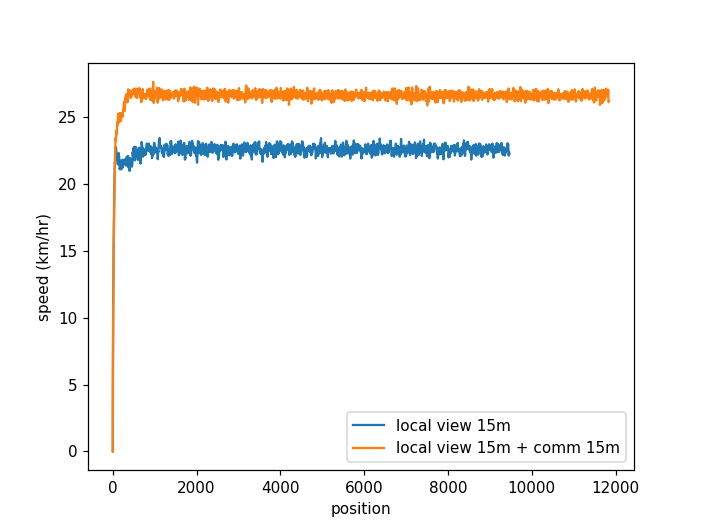

In [164]:
plt.plot(lvPosVector.mean(axis=0), lvSpeedOfAgent.mean(axis=0) * 3.6, label='local view 15m')
plt.plot(lvCommPosVector.mean(axis=0), lvCommSpeedOfAgent.mean(axis=0) *3.6, label='local view 15m + comm 15m')
plt.xlabel('position')
plt.ylabel('speed (km/hr)')
plt.legend()